In [1]:
print('Hello')

Hello


In [4]:
path = 'data/reviews_Books_5.json.gz'
# path = 'reviews_Movies_and_TV_5.json.gz'
# path = 'reviews_Clothing_Shoes_and_Jewelry_5.json.gz'

In [5]:
import pandas as pd
import gzip
import numpy as np

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF(path)

In [6]:
df

reviewerID        asin  \
0        A10000012B7CGYKOMPQ4L  000100039X   
1               A2S166WSCFIFP5  000100039X   
2               A1BM81XB4QHOA3  000100039X   
3               A1MOSTXNIO5MPJ  000100039X   
4               A2XQ5LZHTD4AFT  000100039X   
...                        ...         ...   
8898036         A2Y66HD4J5S7QZ  B00M13FNSS   
8898037         A17YHECC8H9NEY  B00M13FNSS   
8898038         A20KO0BPMNREJL  B00M13FNSS   
8898039         A1BQO66R6OLCCW  B00M13FNSS   
8898040         A2NRGE3CSFY2TQ  B00M13FNSS   

                                            reviewerName helpful  \
0                                                   Adam  [0, 0]   
1        adead_poet@hotmail.com "adead_poet@hotmail.com"  [0, 2]   
2                            Ahoro Blethends "Seriously"  [0, 0]   
3                                              Alan Krug  [0, 0]   
4                                               Alaturka  [7, 9]   
...                                                  ...     ...   
8898036                                            Candi  [2, 2]   
8898037                                           Margie  [0, 0]   
8898038                                            Nicki  [1, 1]   
8898039                                            Nikey  [0, 0]   
8898040                                               Yo  [2, 2]   

                                                reviewText  overall  \
0        Spiritually and mentally inspiring! A book tha...      5.0   
1        This is one my must have books. It is a master...      5.0   
2        This book provides a reflection that you can a...      5.0   
3        I first read THE PROPHET in college back in th...      5.0   
4        A timeless classic.  It is a very demanding an...      5.0   
...                                                    ...      ...   
8898036  Yasss hunny! This is a great read. That Dre is...      5.0   
8898037  I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...      5.0   
8898038  Great book! Cherika was a fool. She let that m...      5.0   
8898039  When I say this was an excellent book please b...      5.0   
8898040  This book was everything. I just hope Alexus w...      5.0   

                                                   summary  unixReviewTime  \
0                                               Wonderful!      1355616000   
1                                             close to god      1071100800   
2                          Must Read for Life Afficianados      1390003200   
3        Timeless for every good and bad time in your l...      1317081600   
4                                            A Modern Rumi      1033948800   
...                                                    ...             ...   
8898036                                A Hot Read Indeed!!      1406073600   
8898037                                     VERY GOOD BOOK      1406073600   
8898038                                         Great Read      1406073600   
8898039                                              Wow!!      1406073600   
8898040                   Great read.hands down #5star hit      1406073600   

          reviewTime  
0        12 16, 2012  
1        12 11, 2003  
2        01 18, 2014  
3        09 27, 2011  
4         10 7, 2002  
...              ...  
8898036  07 23, 2014  
8898037  07 23, 2014  
8898038  07 23, 2014  
8898039  07 23, 2014  
8898040  07 23, 2014  

[8898041 rows x 9 columns]

In [7]:
print(np.unique(np.array(df.reviewerID)).shape)
print(np.unique(np.array(df.asin)).shape)

(603668,)
(367982,)


In [19]:
import collections
x = collections.Counter(np.array(df.asin))
book_rated = np.array(list(x.values()))

In [22]:
x.items()

dict_items([('000100039X', 206), ('0001055178', 18), ('0001473123', 16), ('0001473727', 7), ('0001473905', 6), ('0001712772', 15), ('000171287X', 12), ('0001714538', 7), ('0002005395', 14), ('0002006715', 5), ('0002007649', 9), ('0002007770', 2721), ('0002008572', 17), ('0002051850', 264), ('0002111306', 7), ('0002113570', 34), ('0002117088', 14), ('0002153211', 5), ('0002154129', 6), ('0002154463', 6), ('000215725X', 40), ('0002157330', 5), ('0002158388', 5), ('000215949X', 17), ('0002178559', 7), ('0002179911', 5), ('0002185385', 42), ('000221685X', 9), ('0002216973', 12), ('000221735X', 5), ('0002219417', 156), ('0002221020', 10), ('0002222590', 8), ('000222383X', 59), ('0002226618', 35), ('0002226901', 12), ('0002232529', 10), ('0002239221', 6), ('000224053X', 230), ('0002242052', 262), ('0002243768', 22), ('0002246325', 9), ('0002247399', 2054), ('0002250357', 7), ('0002250519', 12), ('0002251337', 5), ('0002252015', 5), ('0002257858', 11), ('0002310899', 25), ('0002311216', 40), 

In [45]:
np.max(np.array(sorted(book_rated)[-10000:-5000]))

188

In [46]:
selected_book_asin = np.array(list(dict(sorted(x.items(), key=lambda item: item[1])[-10000:-5000]).keys()))

In [48]:
new_df = df[df['asin'].isin(selected_book_asin)]

In [49]:
print(np.unique(np.array(new_df.reviewerID)).shape)
print(np.unique(np.array(new_df.asin)).shape)

(304489,)
(5000,)


In [77]:
value_counter = 0
maps = dict()
def func(x):
    global value_counter
    global maps
    if x not in maps:
        maps[x] = value_counter
        value_counter += 1
    return maps[x]

In [78]:
value_counter, maps = 0, dict()
new_df.reviewerID = new_df.reviewerID.apply(lambda x: func(x))

C:\Users\rrahman3\AppData\Local\Temp\1\ipykernel_13096\993609048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.reviewerID = new_df.reviewerID.apply(lambda x: func(x))


In [79]:
new_df

reviewerID        asin                            reviewerName  \
3536              0  0002219417                               Adam Shah   
3537              1  0002219417  Amazon Customer "Always keep learning"   
3538              2  0002219417                         Amazon Customer   
3539              3  0002219417                         Amazon Customer   
3540              4  0002219417                         Amazon Customer   
...             ...         ...                                     ...   
8897986      209998  B00LZKMXBI                   T.S. Burch "madusa29"   
8897987      209676  B00LZKMXBI                         veronica mostel   
8897988      304486  B00LZKMXBI                                  V.Grey   
8897989      304487  B00LZKMXBI                              wawsalbert   
8897990      304488  B00LZKMXBI                                  Yasmin   

          helpful                                         reviewText  overall  \
3536     [17, 19]  Every Herman Wouk book I have read has been in...      5.0   
3537       [0, 0]  This is a great great book that details the cu...      5.0   
3538       [0, 0]  I recalled this being a mini series from when ...      5.0   
3539       [0, 0]  Like any &#34;historical&#34; fiction novel, o...      5.0   
3540       [0, 0]  splendid story telling. The history is fairly ...      5.0   
...           ...                                                ...      ...   
8897986    [2, 2]  Second Chances was heart warming book.  There ...      5.0   
8897987    [0, 1]  What a great story. I really enjoyed it. Sad b...      5.0   
8897988    [0, 0]  Second Chances was a lovely written story abou...      4.0   
8897989    [2, 3]  The authors knocked this one out of the park! ...      5.0   
8897990    [3, 3]  I was so shock to be given another ARC in the ...      5.0   

                                                   summary  unixReviewTime  \
3536                                    An Incredible Book      1017964800   
3537                                          Winds of War      1344211200   
3538         Epic! A must read for the history enthusiast!      1359158400   
3539     Entertaining read and you will learn something...      1379635200   
3540                            Excellent work. Well paced      1362787200   
...                                                    ...             ...   
8897986  It's a sweet story about loss and a journey of...      1405900800   
8897987                                                Wow      1405987200   
8897988                           &lt;3 Genevieve & Daniel      1406073600   
8897989                   Realistic story of loss and love      1405900800   
8897990                                    PLEASE READ!!!!      1405900800   

          reviewTime  
3536      04 5, 2002  
3537      08 6, 2012  
3538     01 26, 2013  
3539     09 20, 2013  
3540      03 9, 2013  
...              ...  
8897986  07 21, 2014  
8897987  07 22, 2014  
8897988  07 23, 2014  
8897989  07 21, 2014  
8897990  07 21, 2014  

[741033 rows x 9 columns]

In [76]:
indexing_dict = {}
count_indexes = 0
def reindexing(ids):
    global reindexing
    global indexing_dict
    if ids not in indexing_dict:
        indexing_dict[ids] = count_indexes
        count_indexes += 1
    return indexing_dict[ids]
new_df.reviewerID.apply(lambda x: reindexing(x))
new_ff.reviewerID

UnboundLocalError: local variable 'count_indexes' referenced before assignment

In [82]:
selected_reviewer = collections.Counter(np.array(new_df.reviewerID))
reviewers = np.array(list(selected_reviewer.items()))
reviewers[:, 1]
np.where(reviewers[:, 1]>=5)


(array([     0,      7,     12, ..., 301573, 302309, 302627], dtype=int64),)

In [91]:
reviewers[np.where(reviewers[:, 1]>=5)][:, 0]

array([     0,      7,     12, ..., 301573, 302309, 302627], dtype=int64)

In [92]:
xx_df = new_df[new_df['reviewerID'].isin(reviewers[np.where(reviewers[:, 1]>=5)][:, 0])]

In [93]:
xx_df

reviewerID        asin  \
3536              0  0002219417   
3543              7  0002219417   
3548             12  0002219417   
3550             14  0002219417   
3551             15  0002219417   
...             ...         ...   
8897976      138264  B00LZKMXBI   
8897980      149208  B00LZKMXBI   
8897981      155713  B00LZKMXBI   
8897985      264628  B00LZKMXBI   
8897987      209676  B00LZKMXBI   

                                            reviewerName   helpful  \
3536                                           Adam Shah  [17, 19]   
3543                                      Andrew C. LING    [3, 4]   
3548                                   Barbara Mcauliffe    [0, 0]   
3550     Bennet Pomerantz "Bennet Pomerantz, AUDIOWORLD"    [1, 1]   
3551                                             Beverly    [0, 0]   
...                                                  ...       ...   
8897976                                       Sue Dayoub    [2, 3]   
8897980                  The Book Fairy "The Book Fairy"    [0, 0]   
8897981                                                T    [3, 3]   
8897985                                           Tricia    [4, 5]   
8897987                                  veronica mostel    [0, 1]   

                                                reviewText  overall  \
3536     Every Herman Wouk book I have read has been in...      5.0   
3543     For someone interested in long novels and hist...      5.0   
3548     I was going through my old book, looking to cl...      5.0   
3550     This classic novel is epic in scope and feelin...      4.0   
3551     Wonderful story of World War II, told by one m...      5.0   
...                                                    ...      ...   
8897976  Genevieve had it all the love of her high scho...      5.0   
8897980  Amazing! I was crying from page 1 And sweating...      5.0   
8897981  I received an advanced reader's copy of this b...      4.0   
8897985  ARC review..... Let me just start by saying I ...      5.0   
8897987  What a great story. I really enjoyed it. Sad b...      5.0   

                                summary  unixReviewTime   reviewTime  
3536                 An Incredible Book      1017964800   04 5, 2002  
3543      first-rate historical novel!!      1078531200   03 6, 2004  
3548               Recently reread this      1402617600  06 13, 2014  
3550               an epic to listen to      1359676800   02 1, 2013  
3551                 One of my favorite      1389744000  01 15, 2014  
...                                 ...             ...          ...  
8897976  Opening up for A Second Chance      1405900800  07 21, 2014  
8897980                Tears galore!!!!      1406073600  07 23, 2014  
8897981                       Moving On      1405900800  07 21, 2014  
8897985                    Awesome!!!!!      1405900800  07 21, 2014  
8897987                             Wow      1405987200  07 22, 2014  

[298491 rows x 9 columns]

In [94]:
value_counter = 0
maps = dict()
def func(x):
    global value_counter
    global maps
    if x not in maps:
        maps[x] = value_counter
        value_counter += 1
    return maps[x]

In [95]:
value_counter, maps = 0, dict()
xx_df.reviewerID = xx_df.reviewerID.apply(lambda x: func(x))
value_counter, maps = 0, dict()
xx_df.asin = xx_df.asin.apply(lambda x: func(x))

C:\Users\rrahman3\AppData\Local\Temp\1\ipykernel_13096\847667023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx_df.reviewerID = xx_df.reviewerID.apply(lambda x: func(x))
C:\Users\rrahman3\AppData\Local\Temp\1\ipykernel_13096\847667023.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx_df.asin = xx_df.asin.apply(lambda x: func(x))


In [96]:
xx_df

reviewerID  asin                                     reviewerName  \
3536              0     0                                        Adam Shah   
3543              1     0                                   Andrew C. LING   
3548              2     0                                Barbara Mcauliffe   
3550              3     0  Bennet Pomerantz "Bennet Pomerantz, AUDIOWORLD"   
3551              4     0                                          Beverly   
...             ...   ...                                              ...   
8897976       20097  4999                                       Sue Dayoub   
8897980       20787  4999                  The Book Fairy "The Book Fairy"   
8897981       21836  4999                                                T   
8897985       27847  4999                                           Tricia   
8897987       25608  4999                                  veronica mostel   

          helpful                                         reviewText  overall  \
3536     [17, 19]  Every Herman Wouk book I have read has been in...      5.0   
3543       [3, 4]  For someone interested in long novels and hist...      5.0   
3548       [0, 0]  I was going through my old book, looking to cl...      5.0   
3550       [1, 1]  This classic novel is epic in scope and feelin...      4.0   
3551       [0, 0]  Wonderful story of World War II, told by one m...      5.0   
...           ...                                                ...      ...   
8897976    [2, 3]  Genevieve had it all the love of her high scho...      5.0   
8897980    [0, 0]  Amazing! I was crying from page 1 And sweating...      5.0   
8897981    [3, 3]  I received an advanced reader's copy of this b...      4.0   
8897985    [4, 5]  ARC review..... Let me just start by saying I ...      5.0   
8897987    [0, 1]  What a great story. I really enjoyed it. Sad b...      5.0   

                                summary  unixReviewTime   reviewTime  
3536                 An Incredible Book      1017964800   04 5, 2002  
3543      first-rate historical novel!!      1078531200   03 6, 2004  
3548               Recently reread this      1402617600  06 13, 2014  
3550               an epic to listen to      1359676800   02 1, 2013  
3551                 One of my favorite      1389744000  01 15, 2014  
...                                 ...             ...          ...  
8897976  Opening up for A Second Chance      1405900800  07 21, 2014  
8897980                Tears galore!!!!      1406073600  07 23, 2014  
8897981                       Moving On      1405900800  07 21, 2014  
8897985                    Awesome!!!!!      1405900800  07 21, 2014  
8897987                             Wow      1405987200  07 22, 2014  

[298491 rows x 9 columns]

In [97]:
xx_df = xx_df[['reviewerID', 'asin', 'overall']]

In [98]:
xx_df

reviewerID  asin  overall
3536              0     0      5.0
3543              1     0      5.0
3548              2     0      5.0
3550              3     0      4.0
3551              4     0      5.0
...             ...   ...      ...
8897976       20097  4999      5.0
8897980       20787  4999      5.0
8897981       21836  4999      4.0
8897985       27847  4999      5.0
8897987       25608  4999      5.0

[298491 rows x 3 columns]

In [99]:
xx_df.to_csv('data/reviews_Books_300K.csv', index=False)

In [100]:
num_users = np.max(np.array(xx_df.reviewerID))
num_items = np.max(np.array(xx_df.asin))

user_interactions = [np.array([]) for __ in range(num_users+1)]
user_ratings = [np.array([]) for __ in range(num_users+1)]

In [102]:
num_users

27969

In [103]:
user_item_ratings = [np.array([__]) for __ in range(num_users+1)]
for index, row in xx_df.iterrows():
    # print(row.reviewerID, row.asin, row.overall)
    user_item_ratings[int(row.reviewerID)] = np.append(user_item_ratings[int(row.reviewerID)], [int(row.asin), int(row.overall)])

In [107]:
with open('data/reviews_Books_300K_sequences', 'w') as f:
    for __ in user_item_ratings:
#         print(" ".join(str(_) for _ in __))
#         break
        f.write(" ".join(str(_) for _ in __))
        f.write("\n")

In [105]:
user_item_ratings[432]

array([ 432,   10,    5,  607,    5, 1047,    4, 1299,    5, 1826,    4])

In [15]:
book_rated.sort()

In [17]:
book_rated[-10000:]

array([ 121,  121,  121, ..., 4864, 6717, 7440])

In [7]:
from collections import Counter
users = np.array(list(Counter(np.array(df.reviewerID)).values()))
print(users)
print(np.min(users))
print(np.max(users))
print(np.mean(users))
print(np.var(users))

[  8 556   6 ...   5   5   6]
5
23222
14.739958056415116
2680.7957385114623


In [8]:
from collections import Counter
users = np.array(list(Counter(np.array(df.asin)).values()))
print(users)
print(np.min(users))
print(np.max(users))
print(np.mean(users))
print(np.var(users))

[206  18  16 ...  13  30   7]
5
7440
24.180641987923323
4396.081914835878


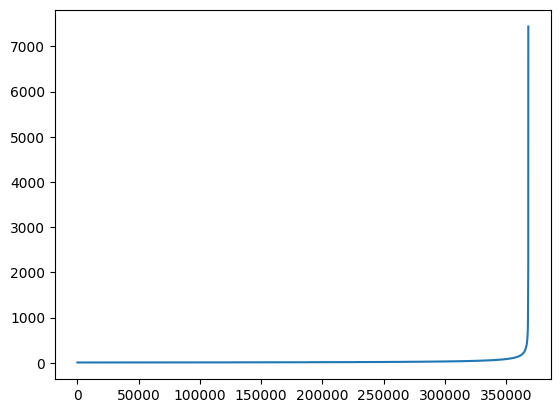

In [9]:
import matplotlib.pyplot as plt
plt.plot(np.sort(users))

In [10]:
df

reviewerID        asin  \
0        A10000012B7CGYKOMPQ4L  000100039X   
1               A2S166WSCFIFP5  000100039X   
2               A1BM81XB4QHOA3  000100039X   
3               A1MOSTXNIO5MPJ  000100039X   
4               A2XQ5LZHTD4AFT  000100039X   
...                        ...         ...   
8898036         A2Y66HD4J5S7QZ  B00M13FNSS   
8898037         A17YHECC8H9NEY  B00M13FNSS   
8898038         A20KO0BPMNREJL  B00M13FNSS   
8898039         A1BQO66R6OLCCW  B00M13FNSS   
8898040         A2NRGE3CSFY2TQ  B00M13FNSS   

                                            reviewerName helpful  \
0                                                   Adam  [0, 0]   
1        adead_poet@hotmail.com "adead_poet@hotmail.com"  [0, 2]   
2                            Ahoro Blethends "Seriously"  [0, 0]   
3                                              Alan Krug  [0, 0]   
4                                               Alaturka  [7, 9]   
...                                                  ...     ...   
8898036                                            Candi  [2, 2]   
8898037                                           Margie  [0, 0]   
8898038                                            Nicki  [1, 1]   
8898039                                            Nikey  [0, 0]   
8898040                                               Yo  [2, 2]   

                                                reviewText  overall  \
0        Spiritually and mentally inspiring! A book tha...      5.0   
1        This is one my must have books. It is a master...      5.0   
2        This book provides a reflection that you can a...      5.0   
3        I first read THE PROPHET in college back in th...      5.0   
4        A timeless classic.  It is a very demanding an...      5.0   
...                                                    ...      ...   
8898036  Yasss hunny! This is a great read. That Dre is...      5.0   
8898037  I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...      5.0   
8898038  Great book! Cherika was a fool. She let that m...      5.0   
8898039  When I say this was an excellent book please b...      5.0   
8898040  This book was everything. I just hope Alexus w...      5.0   

                                                   summary  unixReviewTime  \
0                                               Wonderful!      1355616000   
1                                             close to god      1071100800   
2                          Must Read for Life Afficianados      1390003200   
3        Timeless for every good and bad time in your l...      1317081600   
4                                            A Modern Rumi      1033948800   
...                                                    ...             ...   
8898036                                A Hot Read Indeed!!      1406073600   
8898037                                     VERY GOOD BOOK      1406073600   
8898038                                         Great Read      1406073600   
8898039                                              Wow!!      1406073600   
8898040                   Great read.hands down #5star hit      1406073600   

          reviewTime  
0        12 16, 2012  
1        12 11, 2003  
2        01 18, 2014  
3        09 27, 2011  
4         10 7, 2002  
...              ...  
8898036  07 23, 2014  
8898037  07 23, 2014  
8898038  07 23, 2014  
8898039  07 23, 2014  
8898040  07 23, 2014  

[8898041 rows x 9 columns]